In [1]:
import os
import xarray as xr


In [2]:
dir_files = [os.path.join("short_range_18files/input", files) for files in os.listdir("short_range_18files/input")]
print(dir_files)

['short_range_18files/input/nwm.t00z.short_range.channel_rt.f016.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f014.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f008.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f012.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f006.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f018.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f009.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f015.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f004.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f010.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f002.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f005.conus.nc', 'short_range_18files/input/nwm.t00z.short_range.channel_rt.f017.conus.nc', 'short_range_18files/inp

In [3]:
fds = []
for f in dir_files:
    fds.append(xr.open_dataset(f))

In [4]:
%%time
fds_c_2 = xr.concat(fds,dim="time")
fds_c_2

CPU times: user 7.06 s, sys: 1.58 s, total: 8.64 s
Wall time: 8.91 s


<xarray.Dataset>
Dimensions:         (time: 18, reference_time: 1, feature_id: 2776738)
Coordinates:
  * time            (time) datetime64[ns] 2022-09-11T16:00:00 ... 2022-09-11T...
  * reference_time  (reference_time) datetime64[ns] 2022-09-11
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
Data variables:
    crs             (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    streamflow      (time, feature_id) float64 0.18 0.01 0.01 ... 0.0 0.0 0.0
    nudge           (time, feature_id) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    velocity        (time, feature_id) float64 0.08 0.1 0.1 ... 0.02 0.0 0.02
    qSfcLatRunoff   (time, feature_id) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    qBucket         (time, feature_id) float64 0.0034 0.00893 ... 0.00016
    qBtmVertRunoff  (time, feature_id) float64 12.04 26.06 9.118 ... 0.528 0.746
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v2.2
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2022-09-11_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2022-09-11_16:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [5]:
%%time
vec = fds_c_2.feature_id[10000:100000]
vec

CPU times: user 489 µs, sys: 0 ns, total: 489 µs
Wall time: 496 µs


<xarray.DataArray 'feature_id' (feature_id: 90000)>
array([ 252768,  252772,  252776, ..., 1122639, 1122641, 1122643], dtype=int32)
Coordinates:
  * feature_id  (feature_id) int32 252768 252772 252776 ... 1122641 1122643
Attributes:
    long_name:  Reach ID
    comment:    NHDPlusv2 ComIDs within CONUS, arbitrary Reach IDs outside of...
    cf_role:    timeseries_id

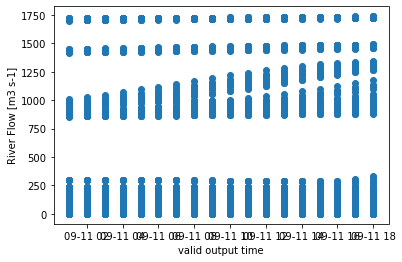

In [6]:
fds_c_2.loc[{"feature_id": vec}].plot.scatter("time", "streamflow")

In [7]:
fds_c_2.transpose("feature_id", "reference_time", "time")

<xarray.Dataset>
Dimensions:         (time: 18, reference_time: 1, feature_id: 2776738)
Coordinates:
  * time            (time) datetime64[ns] 2022-09-11T16:00:00 ... 2022-09-11T...
  * reference_time  (reference_time) datetime64[ns] 2022-09-11
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
Data variables:
    crs             (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    streamflow      (feature_id, time) float64 0.18 0.18 0.18 ... 0.0 0.0 0.0
    nudge           (feature_id, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    velocity        (feature_id, time) float64 0.08 0.08 0.08 ... 0.02 0.02 0.02
    qSfcLatRunoff   (feature_id, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    qBucket         (feature_id, time) float64 0.0034 0.0034 ... 0.00017 0.00016
    qBtmVertRunoff  (feature_id, time) float64 12.04 12.07 12.14 ... 0.888 0.746
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v2.2
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2022-09-11_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2022-09-11_16:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...